# Homework: "Karen"
Sep. 9, 2020

More Pandas, but this time tackling a sociolinguistic issue: the recent prominence of the stereotype "Karen".

The woman's name Karen, which was previously entirely unremarkable, has recently become understood to pejoratively reference a specific social type: an entitled and officious white woman, typically with short-ish blonde hair, middle-aged, who imperiously demands to "speak with the manager".

This stereotype sits in a somewhat complicated positiion in our current social climate.  On the one hand, "Karens" are frequently mocked for their racism, so the use of the term tends to signal an anti-racist stance.  On the other hand, the stereotype also appears to have [sexist undertones](https://www.latimes.com/opinion/story/2020-05-23/column-karen-meme-white-women-behaving-badly): why hold a woman's name up for mockery in this connection, and not a man's?   This has led a number of people to ask: what is the male version of "Karen"?

Unhappily for me, someone has recently argued that the male version of "Karen" is "Terry".  

And this isn't just speculation - there is actual data backing it up.  It turns out that the [frequency profiles over historical time](https://www.reddit.com/r/dataisbeautiful/comments/i9ljw9/i_analysed_70_years_of_baby_names_in_the_us_to/) of the names "Karen" and "Terry" in the US are quite similar in shape.  The data are from the US Social Security Administration, specifically their [Popular Baby Names dataset](https://www.ssa.gov/oact/babynames/limits.html), which covers the years 1880-2018.  I have downloaded the data and included it in this homework folder.

Your homework assignment is to replicate this finding, examine its assumptions, and see if you can save your poor instructor by finding solid grounds for pushing back against the original claim.  

If that doesn't work, at least we'll have tried.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
# we start by creating a df, reading in all SSA baby-name data, and loading it into that df.
# insert YOB = year of birth as new column in df.  we will need this.
df = pd.DataFrame()
for year in range(1880,2018+1):
    indf = pd.read_csv("data/yob"+str(year)+".txt",names=['Name','Sex','Count'])
    indf['YOB'] = year
    df = df.append(indf)
df

,Name,Sex,Count,YOB
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


In [6]:
# that takes a while, but the result is a df of length 1,957,046.
# now let's get some basic descriptive statistics.
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))  # suppress scientific notation

,Count,YOB
count,1.95705e+06,1.95705e+06
mean,179.686,1975.56
std,1522.8,34.1912
min,5,1880
25%,7,1952
50%,12,1985
75%,32,2004
max,99689,2018


### Replicate the original finding.

The original finding plotted, for both "Karen" and "Terry", the number of births per year in the US as a percent of peak popularity.

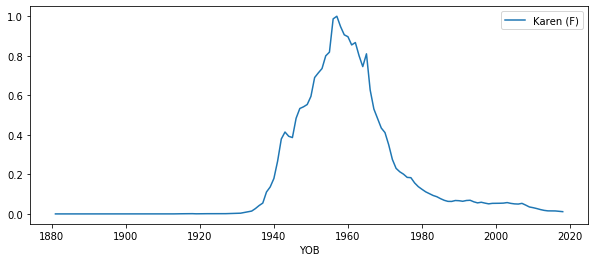

In [4]:
# Karen first.
# NB: Karen is sometimes used as a man's name - filter those out, and get the Karen df.
# NB: i am making a COPY so that kdf can be munged independently of df.
# otherwise you get a warning about updating a derivative of a df.
kdf = df[(df.Name=='Karen') & (df.Sex=='F')].copy()  # select corresponding rows; make a copy
k_peak = kdf.Count.max()  # peak popularity.
kdf['ScaledCount'] = kdf.Count / k_peak  # number of births as percent of peak popularity.
kdf.plot(kind='line',x='YOB',y='ScaledCount',label='Karen (F)', figsize=(10,4))
plt.show()

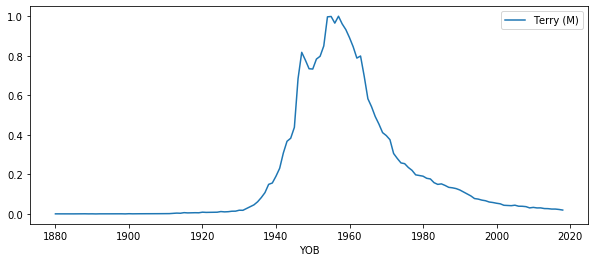

In [5]:
# now the same thing for Terry, as a man's name.
tdf = df[(df.Name=='Terry') & (df.Sex=='M')].copy()
t_peak = tdf.Count.max()  # peak popularity.
tdf['ScaledCount'] = tdf.Count / t_peak  # number of births as percent of peak popularity.
tdf.plot(kind='line',x='YOB',y='ScaledCount',label='Terry (M)', figsize=(10,4))
plt.show()

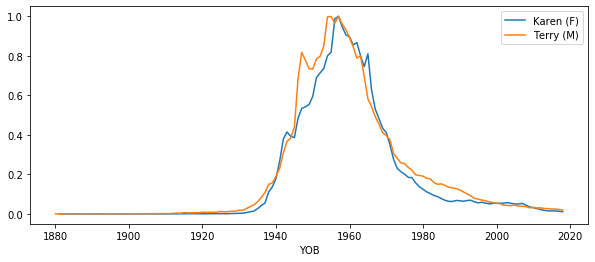

In [6]:
# now plot both together
ax = plt.gca()  # get current axis to share.
kdf.plot(kind='line',x='YOB',y='ScaledCount',label='Karen (F)', ax=ax, figsize=(10,4))
tdf.plot(kind='line',x='YOB',y='ScaledCount',label='Terry (M)', ax=ax, figsize=(10,4))
plt.show()

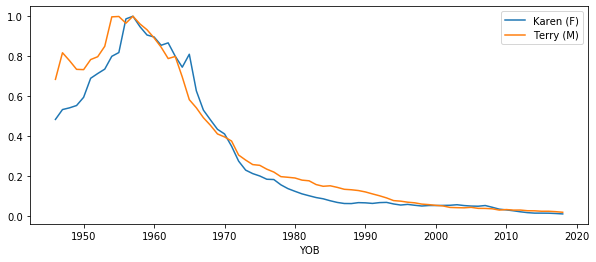

In [7]:
# now plot both together, but only the recent past, as in the reddit post.
ax = plt.gca()  # get current axis to share.
kdf[kdf.YOB>=1946].plot(kind='line',x='YOB',y='ScaledCount',label='Karen (F)',ax=ax, figsize=(10,4))
tdf[tdf.YOB>=1946].plot(kind='line',x='YOB',y='ScaledCount',label='Terry (M)',ax=ax, figsize=(10,4))
plt.show()

OK, that looks like a replication, at least qualitatively.  It seems the Reddit post had the curves for Karen and Terry swapped, but that doesn't really change anything.

### Extension

There are at least 2 questions left open by the analysis above.

- The data were plotted as a percent of peak popularity.  This means any difference in overall popularity of names is completely ignored, and all we get is a normalized profile that necessarily peaks at 1.0.  How would the results of the analysis change if we were to instead consider raw counts, rather than counts as a percent of peak popularity?
- Are there other male names that fit the Karen curve even more closely?  The Reddit post suggests (but doesn't actually say) that Terry fits more closely than other male names.  Let's find out - and we can do so for both ways of considering the data: percent of peak popularity, and raw counts.

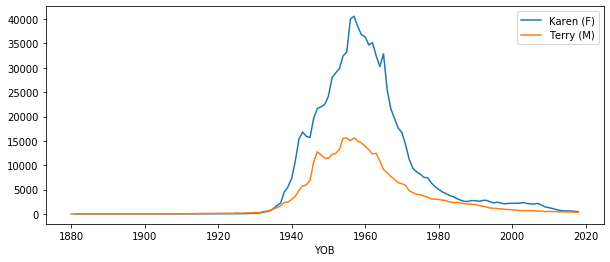

In [8]:
# let's start by plotting raw counts for Karen and Terry.
# and let's plot all years, so we get the full picture.
# this is just like our previous all-years plot for both names, but we want raw counts now.

# YOUR CODE GOES HERE.
ax = plt.gca()
kdf.plot(kind='line',x='YOB',y='Count',label='Karen (F)', ax=ax, figsize=(10,4))
tdf.plot(kind='line',x='YOB',y='Count',label='Terry (M)', ax=ax, figsize=(10,4))
plt.show()

However well or poorly Terry aligns with Karen in terms of raw counts, it might align better with Karen than any other male name does.  Is that the case?  Let's find out.

To do that, we will:
- Pull together all male names.
- Notice that there are lots of them.
- Sort them by frequency to focus on the top 100.
- Reassure ourselves that Terry is in that much smaller set.  
- Compare the profile of each male name in that smaller set with the profile of Karen, and find the best match.

We want a smaller set just to keep the amount of computation reasonable.

I have done this for you, to set you up for the next step, below.

In [9]:
# start by getting all names for men.
names_male = df[df.Sex=='M'].Name.unique() # 41,475
print("There are", len(names_male), "names for men in the dataset.")

There are 41475 names for men in the dataset.


In [10]:
# that's a lot of names!  let's see if we can get away with considering only the top 100 or so.
# group by names, restricting attn to men for now.
grouped = df[df.Sex=='M'].groupby('Name')
# find out how often each name was used overall.
counts = grouped.Count.sum()
counts

Name
Aaban     114
Aabid      16
Aabir      10
Aadam     273
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: Count, Length: 41475, dtype: int64

In [11]:
# now sort names by popularity
s = counts.sort_values(ascending=False)
s

Name
James      5164280
John       5124817
Robert     4820129
Michael    4362731
William    4117369
            ...   
Chiante          5
Lrey             5
Lozell           5
Loyall           5
Carnes           5
Name: Count, Length: 41475, dtype: int64

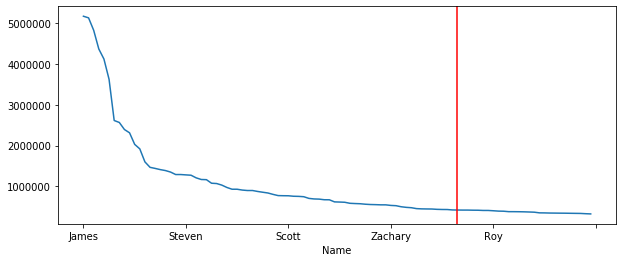

In [12]:
# and now finally plot, showing Terry relative to other names.
ax = s[:100].plot(kind='line', figsize=(10,4))
# find what number 'Terry' is in this sequence.
ix = s.index.to_list().index('Terry')
ax.axvline(ix,color='red')  # draw vertical line.
plt.show()

In [13]:
# since Terry is in the top 100 male names, and Karen is more popular than Terry, we're probably
# safe considering only the top 100 male names.
sorted_male_names = s[:100].index.to_list()
print("Top 10 male names:\n", sorted_male_names[:10])

Top 10 male names:
 ['James', 'John', 'Robert', 'Michael', 'William', 'David', 'Joseph', 'Richard', 'Charles', 'Thomas']


In [14]:
# get karen raw counts profile.  we include YOB bc we can't assume karen exists for each year.
# and we set YOB to be the index
k = kdf[['YOB','Count']].set_index('YOB')  # [[]]: select columns
k

,Count
YOB,
1881,6
1885,10
1886,9
1887,9
1888,5
...,...
2014,631
2015,626
2016,615


In [15]:
# some years could be missing - and in fact some are!  
# so let's re-index, using the full set of years, and assign 0 for years that aren't in k.
kk = k.reindex(range(1880,2018+1),fill_value=0)
kk

,Count
YOB,
1880,0
1881,6
1882,0
1883,0
1884,0
...,...
2014,631
2015,626
2016,615


In [16]:
# now cycle through male names, analogously filling in blank years for each of them.
# and then find MSE of each to karen counts over time.
d = dict()
for name in sorted_male_names:
    # YOUR CODE GOES HERE.  
    # define mm by analogy with kk - it is a dataframe consisting of rows where Name is name, and 
    # sex is M, and we extract the YOB and Count columns only, and set the index to be YOB.
    # and then, as with kk, we reindex to be sure we're covering all years, and fill in any 
    # blanks with 0.
    ndf = df[(df.Name == name) & (df.Sex == 'M')].copy()
    m = ndf[['YOB', 'Count']].set_index('YOB')
    mm = m.reindex(range(1880, 2018 + 1), fill_value = 0)
    
    mse = mean_squared_error(kk.Count, mm.Count)
    d[name] = mse
best_aligned = min(d, key=d.get)
print("Best aligned with Karen, by MSE, raw counts:", best_aligned)

Best aligned with Karen, by MSE, raw counts: Gary


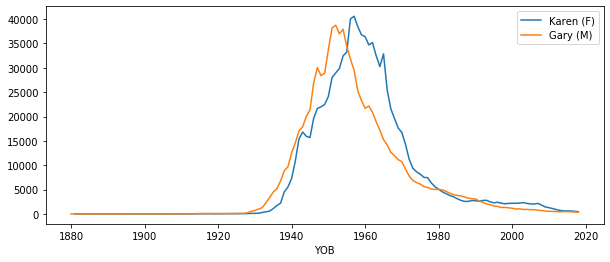

In [17]:
# so how does mr. best_aligned look relative to Karen, considering just raw counts?
ax = plt.gca()  # get current axis to share.
gdf = df[(df.Name==best_aligned) & (df.Sex=='M')].copy()
kdf.plot(kind='line',x='YOB',y='Count',label='Karen (F)', ax=ax, figsize=(10,4))
gdf.plot(kind='line',x='YOB',y='Count',label=best_aligned+' (M)', ax=ax, figsize=(10,4))
plt.show()

In [18]:
# get karen scaled counts profile.  we include YOB bc we can't assume karen exists for each year.
k = kdf[['YOB','ScaledCount']].set_index('YOB')
kk = k.reindex(range(1880,2018+1),fill_value=0)

# now cycle through male names, and find MSE of each to karen scaled counts over time.
d = dict()
for name in sorted_male_names:
    # YOUR CODE GOES HERE.  
    # define mm by analogy with kk - it is a dataframe consisting of rows where Name is name, and 
    # sex is M, and we extract the YOB and ScaledCount columns only, and set the index to be YOB.
    # and then, as with kk, we reindex to be sure we're covering all years, and fill in any 
    # blanks with 0.
    # note that although we have already defined ScaledCount for Karen, we haven't for most
    # male names - so we'll have to do that here as well - because as you can see below, we
    # will be using ScaledCount.
    ndf = df[(df.Name == name) & (df.Sex == 'M')].copy()
    n_peak = ndf.Count.max()
    ndf['ScaledCount'] = ndf.Count / n_peak
    m = ndf[['YOB', 'ScaledCount']].set_index('YOB')
    mm = m.reindex(range(1880, 2018 + 1), fill_value = 0)
    
    mse = mean_squared_error(kk.ScaledCount, mm.ScaledCount)
    d[name] = mse
best_aligned = min(d, key=d.get)
print("Best aligned with Karen, by MSE, scaled counts:", best_aligned)

Best aligned with Karen, by MSE, scaled counts: Terry


### Concluding observations

Say a few brief words here about what you can conclude from the analyses above.

When comparing raw counts, Gary is best aligned with the female name Karen; but when comparing scaled counts, Terry is still best aligned with Karen.